In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

plt.style.use('seaborn')
sns.set(font_scale=2.5) 
# matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.

import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore') # 워닝 메세지를 생략해 줍니다. 차후 버전관리를 위해 필요한 정보라고 생각하시면 주석처리 하시면 됩니다.

%matplotlib inline

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


/tmp/ipykernel_17/2798787890.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
train_data_path = "/kaggle/input/titanic/train.csv"
train_data = pd.read_csv(train_data_path)

test_data_path = "/kaggle/input/titanic/test.csv"
test_data = pd.read_csv(test_data_path)

gender_submission_path = "/kaggle/input/titanic/gender_submission.csv"
gender_submission = pd.read_csv(gender_submission_path)

In [3]:
train_data.shape, test_data.shape, gender_submission.shape

((891, 12), (418, 11), (418, 2))

In [4]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
gender_submission.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
train_data.isnull().sum() / train_data.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [9]:
test_data.isnull().sum() / test_data.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [10]:
women = train_data.loc[train_data.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)

print("{} % of women survived".format(rate_women))

0.7420382165605095 % of women survived


In [11]:
men = train_data.loc[train_data.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)

print("{} % of men survived".format(rate_men))

0.18890814558058924 % of men survived


In [12]:
from sklearn.ensemble import RandomForestClassifier

y = train_data['Survived']

features = ['Pclass', 'Sex', 'SibSp', 'Parch']
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth = 5, random_state = 1)
model.fit(X, y)
predictions = model.predict(X_test)

**Target Label인 Survived 확인**   


어떤 distribution을 가지고 있는지 확인
지금 같은 binary classification 문제의 경우,
모델의 평가 방법이 달라질 수 있음

<function matplotlib.pyplot.show(close=None, block=None)>

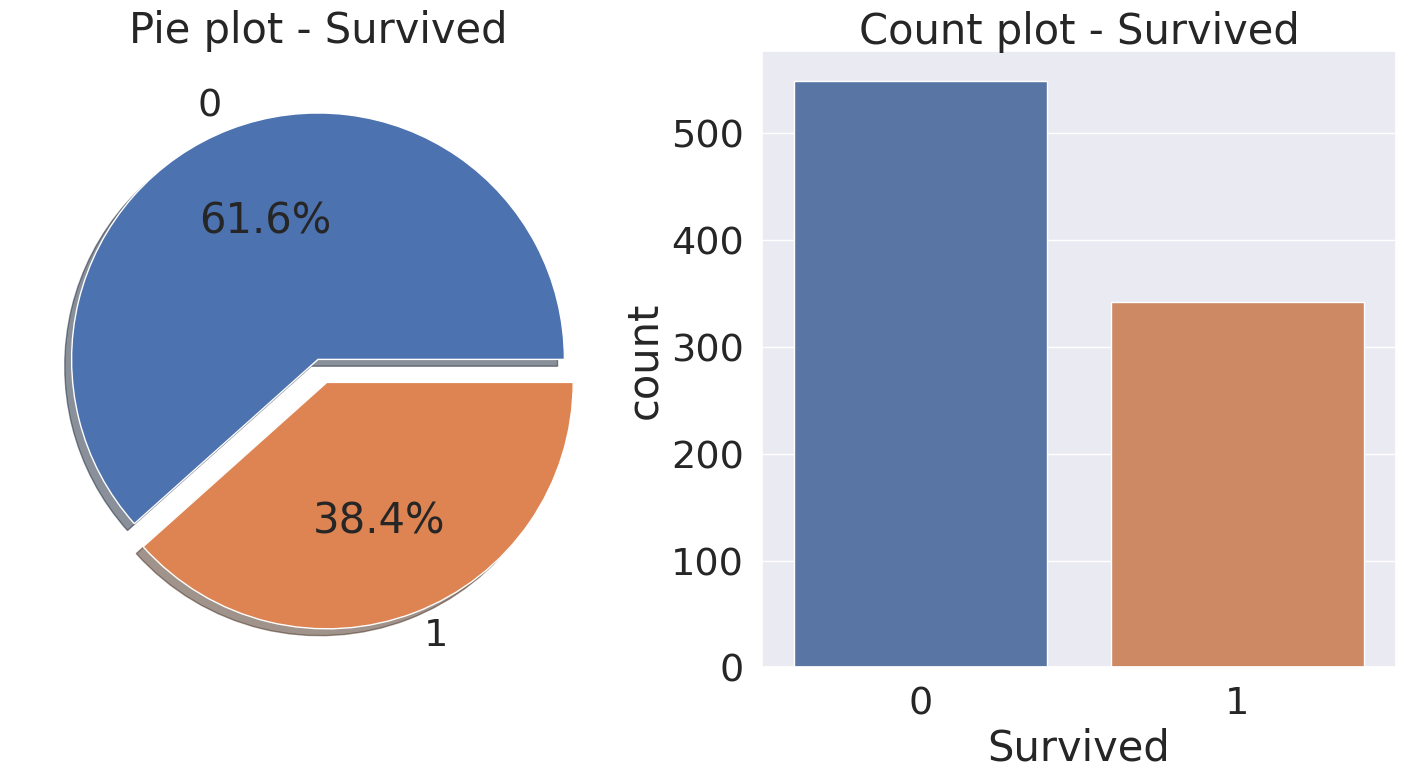

In [13]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

train_data['Survived'].value_counts().plot.pie(explode = [0, 0.1],
                                            autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x = 'Survived', data = train_data, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show

In [14]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).sum() / train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: xlabel='Pclass'>

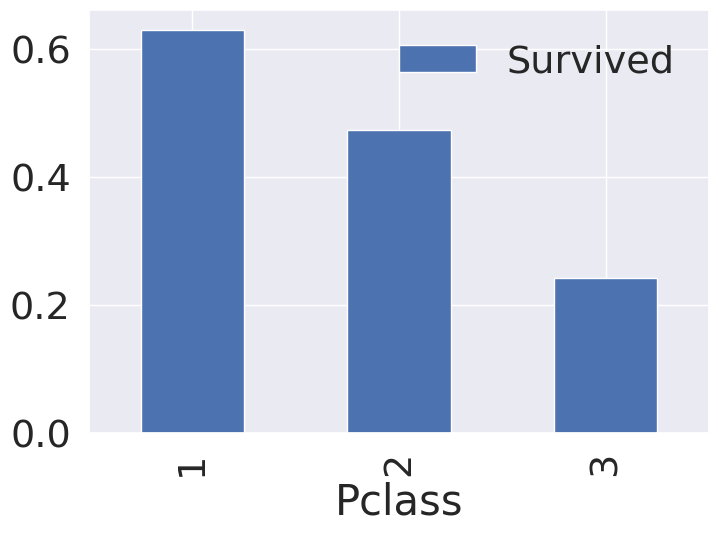

In [15]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().plot.bar()

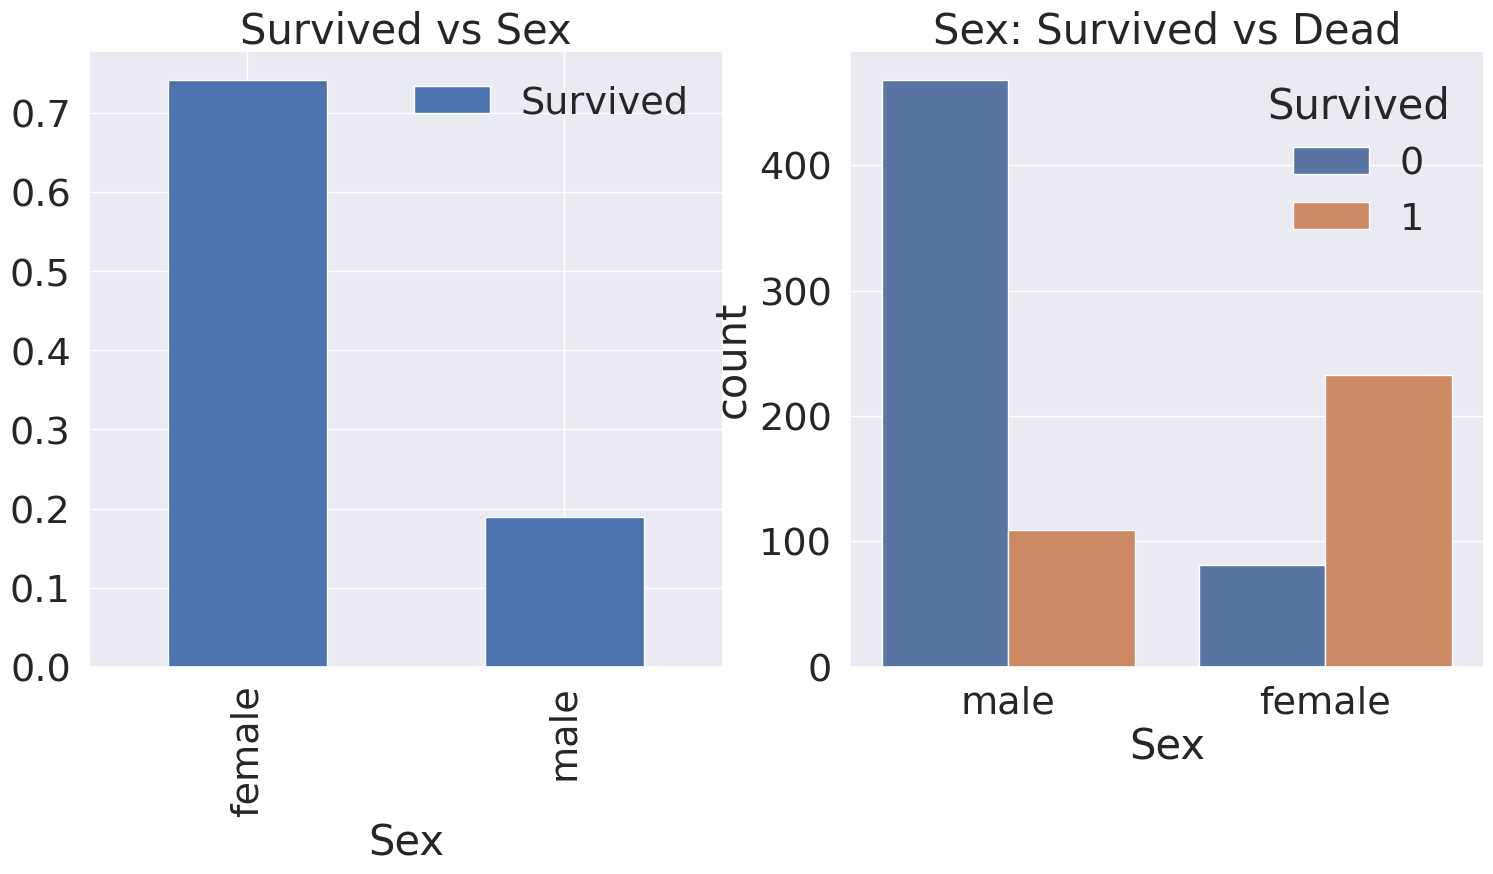

In [16]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x ='Sex', hue = 'Survived', data=train_data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

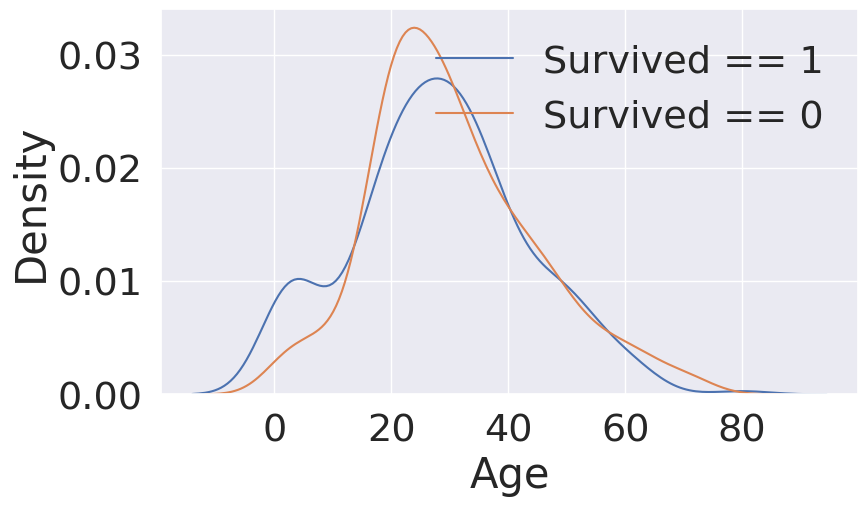

In [17]:
f, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(train_data[train_data['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(train_data[train_data['Survived'] == 0]['Age'], ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()